In [22]:
import csv
import matplotlib.pyplot as plt
import sqlite3
import knmi
import pandas as pd

In [23]:
new_file=open("doorlooptijden.csv", "w", newline='')
writer=csv.writer(new_file , delimiter=";")

In [24]:
con = sqlite3.connect("NO_XXX_EVENT_EXPORT/bridges.db")
cur = con.cursor()

cur.execute('SELECT Tijd, Waarde, Omschrijving FROM WA WHERE Tijd LIKE "%-01-2016%" AND Omschrijving == "SFC Aandrijving Commando Brug Openen" AND Waarde == "TRUE" OR Tijd LIKE "%-01-2016%" AND Omschrijving == "SFC Aandrijving Commando Brug Sluiten" AND Waarde == "FALSE" ORDER BY Tijd')
writer.writerow(['Dag', 'Maand', 'Jaar', 'Tijd', 'Open'])
for row in cur.fetchall():
    for column in row:
        if column == row[0]:
            dag = column[0:2]
            maand = column[3:5]
            jaar = column[6:10]
            tijd = column[11:23]
        if column == row[1]:
            opened = column
    writer.writerow([dag, maand, jaar, tijd, opened])
con.close()
new_file.close()

In [25]:
timelist = []
daylist = []

In [26]:
with open("doorlooptijden.csv") as f:
    first = None
    second = None
    Fday = None
    Sday = None
    r = csv.reader(f, delimiter=";")
    next(r)
    for row in r:
        for column in row:
            if column == row[3]:
                if first == None:
                    Fday = int(row[0])
                    Fhour = int(column[0:2])
                    Fminute = int(column[3:5])
                    Fsecond = int(column[6:8])
                    Fmilisecond = int(column[9:12])
                    first = Fhour*60*60*1000 +Fminute*60*1000 + Fsecond*1000 + Fmilisecond
                else:
                    Sday = int(row[0])
                    Shour = int(column[0:2])
                    Sminute = int(column[3:5])
                    Ssecond = int(column[6:8])
                    Smilisecond = int(column[9:12])
                    second = Shour*60*60*1000 +Sminute*60*1000 + Ssecond*1000 + Smilisecond
                    time_between = second-first
                    if time_between < 0:
                        time_between = second-first+24*60*60*1000
                        
                    if ((Sday-Fday)/2) == 0.5:
                        _day = Fday + 0.5
                    else:
                        _day = Fday
                        
                    print(str(_day)+" "+str("{:02d}".format(int(int((time_between-time_between%1000)/1000)/60)))+":"+str("{:02d}".format(int((time_between-time_between%1000)/1000)%60)))
                    timelist += [time_between/1000]
                    daylist += [_day]
                    first = None
                    second = None    

4 05:06
5 04:45
6 06:08
6 04:46
6 04:57
7 05:06
7 05:03
7 04:04
8 05:37
8 04:54
8 05:46
11 03:26
12 05:01
13 01:43
13 11:31
13 04:21
13 07:32
13 05:34
14 96:15
14 03:27
14 04:13
15 04:28
15 05:00
15 04:35
15 07:54
16 04:33
16 03:51
17 04:59
17 04:05
19 05:52
19 04:39
19 05:22
20 05:13
21 06:41
21 07:37
21 04:50
22 04:28
22 04:59
24 05:02
24 04:52
25 06:05
25 04:48
25 08:38
26 05:05
26 04:24
26 07:12
26 02:33
26 02:45
26 06:06
26 05:59
26 05:15
27 04:28
27 05:15
27 04:06
27 05:24
27 04:59
27 04:34
27 04:34
28 05:34
28 04:07
28 04:20
28 05:02
29 04:38
29 03:43
29.5 04:37
30 05:21
30 04:13
31 04:35


In [27]:
print(timelist)

[306.611, 285.604, 368.675, 286.394, 297.106, 306.105, 303.11, 244.404, 337.386, 294.484, 346.272, 206.8, 301.712, 103.306, 691.618, 261.294, 452.685, 334.799, 5775.994, 207.088, 253.885, 268.89, 300.2, 275.595, 474.512, 273.58, 231.826, 299.006, 245.291, 352.004, 279.876, 322.098, 313.613, 401.901, 457.215, 290.993, 268.605, 299.318, 302.814, 292.994, 365.609, 288.306, 518.697, 305.006, 264.796, 432.018, 153.794, 165.399, 366.369, 359.805, 315.006, 268.379, 315.391, 246.707, 324.683, 299.5, 274.891, 274.402, 334.405, 247.405, 260.985, 302.008, 278.203, 223.496, 277.183, 321.573, 253.3, 275.689]


In [28]:
print(daylist)

[4, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 11, 12, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 19, 19, 19, 20, 21, 21, 21, 22, 22, 24, 24, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29.5, 30, 30, 31]


In [29]:
rows = zip(daylist, timelist)
new_file2=open("doorloopsec.csv", "w", newline='')
writer=csv.writer(new_file2 , delimiter=";")
writer.writerow(['Dag', 'Tijd'])
for row in rows:
    writer.writerow(row)
new_file2.close()

In [30]:
df = pd.read_csv('doorloopsec.csv', delimiter= ';')
df.groupby('Dag')
df2 = df.drop_duplicates('Dag')

In [31]:
disclaimer, stations, legend, data = knmi.get_day_data_raw(stations=['350'], start='20151201', end='20151231', inseason=False, variables=['TEMP'])

In [32]:
print(data)

STN,YYYYMMDD,TG,TN,TNH,TX,TXH,T10N,T10NH
350,20151201,105,80,6,129,15,79,6
350,20151202,110,95,20,126,13,87,24
350,20151203,96,81,23,121,13,74,18
350,20151204,90,79,19,108,13,71,24
350,20151205,77,68,7,88,15,61,12
350,20151206,106,72,1,123,19,66,6
350,20151207,105,80,24,134,12,66,24
350,20151208,99,75,2,123,13,61,6
350,20151209,67,30,7,98,13,4,12
350,20151210,53,37,8,81,13,33,12
350,20151211,67,46,2,99,15,39,24
350,20151212,76,28,3,119,20,6,6
350,20151213,75,65,8,116,2,63,12
350,20151214,67,25,19,94,12,1,24
350,20151215,77,38,1,103,23,33,6
350,20151216,119,96,1,130,13,94,6
350,20151217,137,127,9,159,13,117,18
350,20151218,120,106,18,132,1,98,12
350,20151219,124,103,7,145,15,95,12
350,20151220,120,98,8,136,14,88,12
350,20151221,110,99,8,121,22,91,12
350,20151222,130,112,1,142,19,105,6
350,20151223,102,58,20,131,2,37,24
350,20151224,101,67,1,138,14,59,6
350,20151225,97,61,5,139,24,46,6
350,20151226,126,103,21,146,14,96,24
350,20151227,115,85,24,136,15,71,24
350,20151228,79,39,7,116,13,25

In [33]:
csv = knmi.get_day_data_dataframe(stations=['350'], start='20151204', end='20160101', inseason=False, variables=['TEMP'])

In [34]:
tg = csv['TG']
date = csv.index
tglist = []
datelist =[]

for row in tg:
    tglist += [row]
for row in date:
    datelist += [str(row.day)+"-"+str(row.month)+"-"+str(row.year)]
    
tgdf = pd.DataFrame({'date':datelist,'temp':tglist})

print(tgdf.loc[tgdf['date'] == "4-12-2015"])

        date  temp
0  4-12-2015    90


In [35]:
df3 = pd.read_csv('doorloopsec.csv', delimiter= ';', usecols=[0])
index = 0
templist1 = []
while index <= 67:
    day = df3.iloc[index]
    day = str(day)
    day1, day2 = day.split('.')
    days, dayss = day1.split('    ')
    tempor = tgdf.loc[tgdf['date'] == dayss +"-12-2015"]
    tempor = str(tempor)
    name1, name2, name3, name4, name5 = tempor.split()
    print(name5)
    templist1 += [name5]
    index = index + 1
    
#knmi.get_day_data_dataframe(stations=['350'], start='20151204', end='20160101', inseason=False, variables=['TEMP'])

90
77
106
106
106
105
105
105
99
99
99
67
76
75
75
75
75
75
67
67
67
77
77
77
77
119
119
137
137
124
124
124
120
110
110
110
130
130
101
101
97
97
97
126
126
126
126
126
126
126
126
115
115
115
115
115
115
115
79
79
79
79
76
76
76
74
74
79


In [36]:
print(templist1)

['90', '77', '106', '106', '106', '105', '105', '105', '99', '99', '99', '67', '76', '75', '75', '75', '75', '75', '67', '67', '67', '77', '77', '77', '77', '119', '119', '137', '137', '124', '124', '124', '120', '110', '110', '110', '130', '130', '101', '101', '97', '97', '97', '126', '126', '126', '126', '126', '126', '126', '126', '115', '115', '115', '115', '115', '115', '115', '79', '79', '79', '79', '76', '76', '76', '74', '74', '79']


In [37]:
print(timelist)

[306.611, 285.604, 368.675, 286.394, 297.106, 306.105, 303.11, 244.404, 337.386, 294.484, 346.272, 206.8, 301.712, 103.306, 691.618, 261.294, 452.685, 334.799, 5775.994, 207.088, 253.885, 268.89, 300.2, 275.595, 474.512, 273.58, 231.826, 299.006, 245.291, 352.004, 279.876, 322.098, 313.613, 401.901, 457.215, 290.993, 268.605, 299.318, 302.814, 292.994, 365.609, 288.306, 518.697, 305.006, 264.796, 432.018, 153.794, 165.399, 366.369, 359.805, 315.006, 268.379, 315.391, 246.707, 324.683, 299.5, 274.891, 274.402, 334.405, 247.405, 260.985, 302.008, 278.203, 223.496, 277.183, 321.573, 253.3, 275.689]


In [38]:
dfTemp = pd.DataFrame(templist1)
dfTemp.head()

,0
0,90
1,77
2,106
3,106
4,106


In [39]:
dfTime = pd.DataFrame(timelist)
dfTime.head()

,0
0,306.611
1,285.604
2,368.675
3,286.394
4,297.106


In [40]:
dfFinal = pd.concat([dfTemp, dfTime], axis=1)
dfFinal.columns = ["Temp", "Time"]
dfFinal.head()

,Temp,Time
0,90,306.611
1,77,285.604
2,106,368.675
3,106,286.394
4,106,297.106


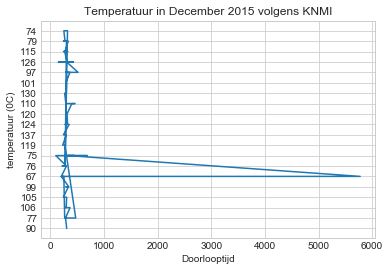

In [41]:
plt.plot(timelist, templist1)
plt.title("Temperatuur in December 2015 volgens KNMI")
plt.xlabel("Doorlooptijd")
plt.ylabel("temperatuur (0C)")
plt.show()

# Linear regression

imports

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
dfFinal = dfFinal.sort_values('Temp', ascending=True)

Temp en Time moeten omgezet worden in strings voor de onderstaande functie.

In [48]:
dfFinal.head(1237890)

,Temp,Time
38,101,302.814
39,101,292.994
5,105,306.105
6,105,303.110
7,105,244.404
2,106,368.675
3,106,286.394
4,106,297.106
33,110,401.901
34,110,457.215


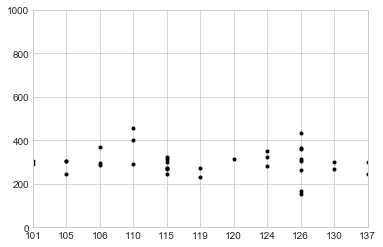

In [49]:
y = dfFinal['Time']
x = dfFinal['Temp']
plt.xlim(0,10)
plt.ylim(0,1000)
plt.plot(x, y, '.', color='black');

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def estimate_coefficients(x,y):
    n = np.size(x)
    
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    SS_xy = np.sum(y*x - n*mean_y*mean_x)
    SS_xx = np.sum(x*x - n*mean_x*mean_x)
    
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1*mean_x
    
    return(b_0, b_1)

In [11]:
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color= "m",marker ="o", s = 30)
    
    y_pred = b[0] + b[1]*x
    
    plt.plot(x, y_pred, color = "g")
    
    plt.xlabel('Temp')
    plt.ylabel('Leadtime')
    
    plt.show()

In [12]:
def main():
    x= np.array([])
    y= np.array([])
    
    print("Estimated coefficients:\nb_0 = {}".format(b[0], b[1]))
    
    plot_regression_line(x, y, b)